<a href="https://colab.research.google.com/github/albertofalco/M72/blob/main/M72_09_Actividad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
ME72: Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos
M72109: Gestión de datos no estructurados
Universidad de Buenos Aires - Facultad de Ciencias Economicas (UBA-FCE)
Año: 2023

Profesor: Facundo Santiago

Alumno: Alberto Falco
```

Actividad 3: Detección de objetos
=================================

Introducción
------------

Hemos visto que los modelos de aprendizaje automático son muy utiles a la hora de resolver problemas de visión por computadora. Uno de estos problemas, es la detección de objetos.

A diferencia de la clasificación de objetos, el modelo que realiza detección identificará o interará identificar la región de la imagen en la cual se encuentra cada objeto que detectó.

En esta actividad, proponemos que construya un modelo que detecte objetos genéricos de imágenes.

### Para ejecutar este notebook

Para ejecutar este notebook, instale las siguientes librerias:

In [ ]:
# !wget https://raw.githubusercontent.com/santiagxf/M72109/master/docs/vision/tasks/classification/code/cnn_class_transfer_learning.txt \
    # --quiet --no-clobber
# !pip install -r object_detection.txt --quiet

Direcciones
-----------

¿Como puede hacer para construir un modelo de detección de objetos? Estos modelos requiere de una gran cantidad de datos para poder entrenarse. Sin embargo, puede conseguir ese modelo de TensorFlow Hub.

Para completar esta actividad deberá:

- Identificar un modelo de detección de objetos que pueda utilizar desde la página de TensorFlow Hub.
- Identifique que preprocesamiento deberá hacer para que este modelo funcione.
- Instancie el modelo elegido y ejecutelo sobre imagenes de prueba.
- ¿Que objetos pudo reconocer? ¿Cuales son los 3 más importantes?


Uso de Inception RESNET v2
---------

In [ ]:
# https://github.com/openvinotoolkit/open_model_zoo/blob/master/data/dataset_classes/coco_91cl_bkgr.txt

In [1]:
# Importacion de librerias.
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

In [2]:
# Carga de RESNET.
module_url = "https://www.kaggle.com/models/tensorflow/faster-rcnn-inception-resnet-v2/frameworks/TensorFlow2/variations/640x640/versions/1"
detector = hub.load(module_url)

In [3]:
# Descarga de imagen de referencia.
! wget https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg -O sample.jpg --no-clobber --quiet

In [4]:
# Función para parseo de imagenes y conversión a tensor.
from PIL import Image

def parse_image(filename, CHANNELS:int=3, IMG_SIZE:int=224):
    img = Image.open(filename)
    img = img.resize((IMG_SIZE, IMG_SIZE))

    img_array = np.array(img)
    img_tensor = tf.convert_to_tensor(img_array)

    if CHANNELS == 3:
      image_normalized = img_tensor
    elif CHANNELS == 1:
      image_normalized = tf.image.rgb_to_grayscale(img_tensor)
    else:
      raise ValueError("El número de canales debe ser 1 o 3.")

    return image_normalized

In [5]:
# Aplicación de la función sobre la imagen de referencia.
sample = parse_image(filename='sample.jpg', CHANNELS=3, IMG_SIZE=640)
print('Las dimensiones del tensor son:',sample.shape)

Las dimensiones del tensor son: (640, 640, 3)


In [7]:
# Reshaping del tensor.
image_tensor = tf.reshape(sample, (1,640,640,3))
print('Las nuevas dimensiones del tensor son:',image_tensor.shape)

Las nuevas dimensiones del tensor son: (1, 640, 640, 3)


In [8]:
# Detección de objetos con RESNET.
results = detector(image_tensor)

In [9]:
# Clase del objeto resultante.
type(results)

dict

In [10]:
# Claves del diccionario.
results.keys()

dict_keys(['raw_detection_scores', 'detection_boxes', 'num_detections', 'detection_classes', 'detection_anchor_indices', 'raw_detection_boxes', 'detection_scores', 'detection_multiclass_scores'])

In [11]:
# Detection_classes devuelve la clase detectada con mayor probabilidad, excepto el fondo (Clase 0).
results['detection_classes'].numpy().astype(int)

array([[62, 62, 86, 62, 62, 62, 28, 64, 67, 62, 28, 67, 62, 62, 62, 62,
        67, 67, 64, 67, 64, 62, 67, 64, 62, 67, 64, 28, 67, 62, 62, 67,
        62, 62, 86, 62, 64, 62, 67, 62, 64, 62, 86, 64, 62, 28, 62, 86,
        67, 64, 62, 67, 62, 67, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62,
        62, 64, 62, 67, 62, 44, 62, 86, 64, 62, 51, 62, 47, 46, 64, 67,
        62, 64, 62, 86, 62, 62,  1, 86, 62, 86, 62, 67, 62, 64, 62, 28,
        67, 62, 31, 46]])

In [12]:
# Mediante el uso de detection_multiclass_scores, se obtiene la clase detectada con mayor probabilidad, incluyendo el fondo (Clase 0).
# Si la probabilidad asignada al fondo (0) es mayor que la probabilidad asignada a un objeto distinto, devuelve el índice 0.
np.argmax(results['detection_multiclass_scores'], axis=2)

array([[62, 62, 86, 62, 62, 62, 28, 64, 67, 62, 28, 67,  0,  0, 62,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])

In [33]:
# El detector devuelve la probabilidad de los objetos detectados (excluyendo el fondo) en orden de probabilidades.
results['detection_scores']

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.9777419 , 0.9122308 , 0.8926369 , 0.8771752 , 0.87281126,
        0.8577293 , 0.83416164, 0.7420759 , 0.72838205, 0.6335371 ,
        0.6116393 , 0.56496215, 0.4691807 , 0.42875382, 0.36734772,
        0.36091655, 0.34462303, 0.30091718, 0.26519877, 0.2629606 ,
        0.2585362 , 0.23313473, 0.22244409, 0.21186754, 0.20128773,
        0.1995165 , 0.18284847, 0.17531905, 0.16961867, 0.15493718,
        0.14304686, 0.14225325, 0.1394188 , 0.1366206 , 0.13586783,
        0.13367203, 0.12416071, 0.12264514, 0.12231091, 0.11527415,
        0.11061167, 0.10769525, 0.10582842, 0.10191473, 0.10088682,
        0.09578098, 0.09238689, 0.08691102, 0.08669922, 0.08591805,
        0.08418244, 0.08346852, 0.08076939, 0.07892667, 0.07407854,
        0.07406449, 0.07375612, 0.07130273, 0.07033996, 0.0696428 ,
        0.06901325, 0.06651851, 0.06598035, 0.06372505, 0.06286077,
        0.06177902, 0.05970832, 0.05887868, 0.05621596, 0.05544039

In [38]:
# Obtencion del listado de clases.
url = 'https://raw.githubusercontent.com/openvinotoolkit/open_model_zoo/master/data/dataset_classes/coco_91cl_bkgr.txt'
names = pd.read_csv(url, header=None)
names = names.to_numpy().squeeze()
print(names)

['__background__' 'person' 'bicycle' 'car' 'motorcycle' 'airplan' 'bus'
 'train' 'truck' 'boat' 'traffic light' 'fire hydrant' 'street sign'
 'stop sign' 'parking meter' 'bench' 'bird' 'cat' 'dog' 'horse' 'sheep'
 'cow' 'elephant' 'bear' 'zebra' 'giraffe' 'hat' 'backpack' 'umbrella'
 'shoe' 'eye glasses' 'handbag' 'tie' 'suitcase' 'frisbee' 'skis'
 'snowboard' 'sports ball' 'kite' 'baseball bat' 'baseball glove'
 'skateboard' 'surfboard' 'tennis racket' 'bottle' 'plate' 'wine glass'
 'cup' 'fork' 'knife' 'spoon' 'bowl' 'banana' 'apple' 'sandwich' 'orange'
 'broccoli' 'carrot' 'hot dog' 'pizza' 'donut' 'cake' 'chair' 'couch'
 'potted plant' 'bed' 'mirror' 'dining table' 'window' 'desk' 'toilet'
 'door' 'tv' 'laptop' 'mouse' 'remote' 'keyboard' 'cell phone' 'microwave'
 'oven' 'toaster' 'sink' 'refrigerator' 'blender' 'book' 'clock' 'vase'
 'scissors' 'teddy bear' 'hair drier' 'toothbrush' 'hair brush']


In [46]:
# Ejemplo para el objeto 14.
print('Clase con mayor probabilidad detectada (excepto fondo): {} ({})'.format(int(results['detection_classes'][0,14]),
                                                                               names[int(results['detection_classes'][0,14])]))
print('Probabilidad asociada:', results['detection_scores'][0,14].numpy())
print('Vector de probabilidades para cada clase:')
print(np.round(results['detection_multiclass_scores'][0][14,:].numpy(),2))

Clase con mayor probabilidad detectada (excepto fondo): 62 (chair)
Probabilidad asociada: 0.36734772
Vector de probabilidades para cada clase:
[0.32 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.37 0.   0.   0.   0.   0.29 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.  ]


In [49]:
# Obtención de los 3 objetos detectados con mayor probabilidad.
best_classes = np.argmax(results['detection_multiclass_scores'], axis=2)[0][0:3]
print([names[class_] for class_ in best_classes])

['chair', 'chair', 'vase']


In [51]:
# Función para la impresión de imagenes y objetos identificados.
import cv2
from google.colab.patches import cv2_imshow

def get_img_boxes(filename:str, size:int, boxes_arr:np.array, class_:str):
  t = parse_image(filename, IMG_SIZE=size)
  img = t.numpy()

  cv2.rectangle(img,
                (boxes_arr[1], boxes_arr[0]), # x_min, y_min (from top)
                (boxes_arr[3], boxes_arr[2]), # x_max, y_max (from top)
                (0, 255, 0),
                2)

  cv2.putText(img,
              class_,
               (boxes_arr[1], boxes_arr[0] - int(size*0.02)),
              cv2.FONT_HERSHEY_SIMPLEX,
              0.5,
               (0,255,0),
              2,
              cv2.LINE_AA)

  return cv2_imshow(img)

# Función para output de imagenes.
def print_img(idx:int):
  print(results['detection_boxes'][0][idx].numpy() * 640)

  pixels = results['detection_boxes'][0][idx].numpy() * 640
  pixels = pixels.astype(int)

  get_img_boxes('sample.jpg', 640, pixels, names[int(results['detection_classes'][0][idx])])

[418.25378 250.35422 596.86884 329.04492]


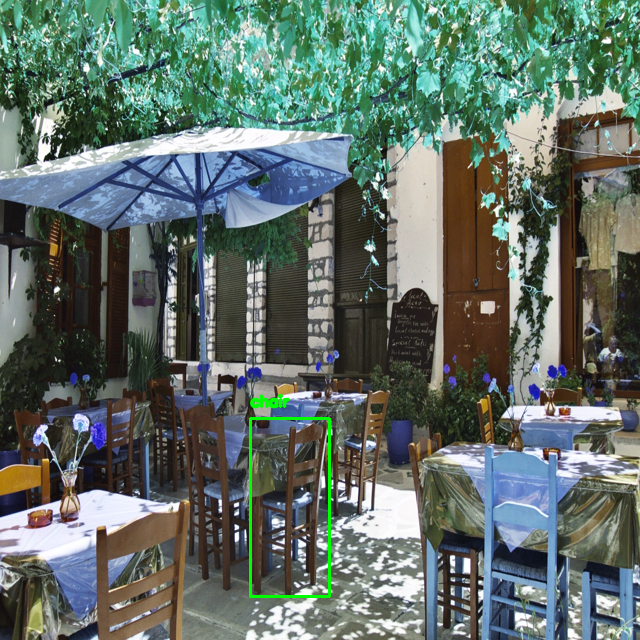

In [53]:
# Impresión de imagen y objeto identificado.
print_img(0)

[401.8885  183.9993  589.80383 254.65416]


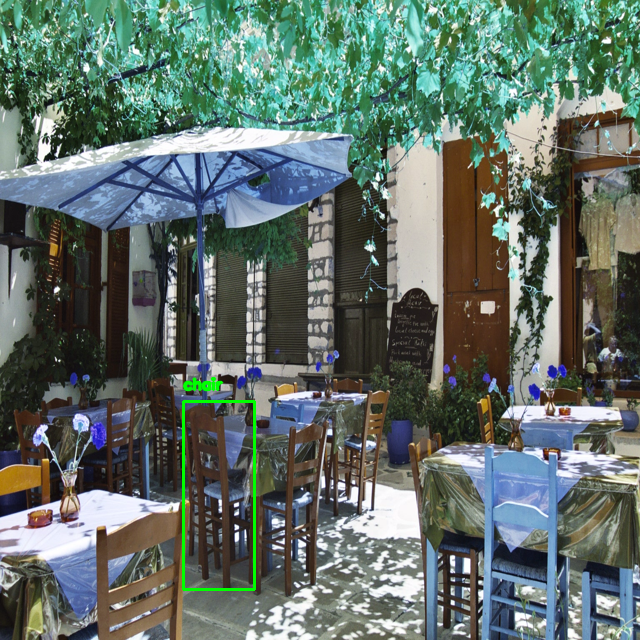

In [54]:
# Impresión de imagen y objeto identificado.
print_img(1)

[476.19446   59.718376 519.813     80.88859 ]


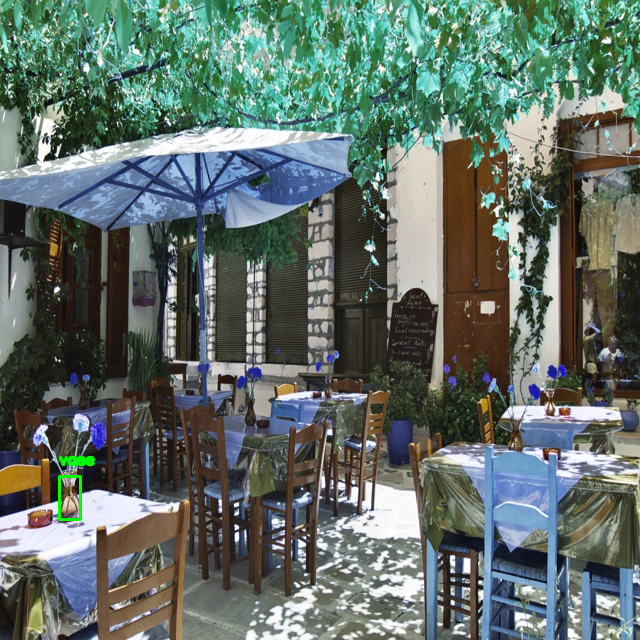

In [55]:
# Impresión de imagen y objeto identificado.
print_img(2)

[462.91672    0.       520.79834   45.372444]


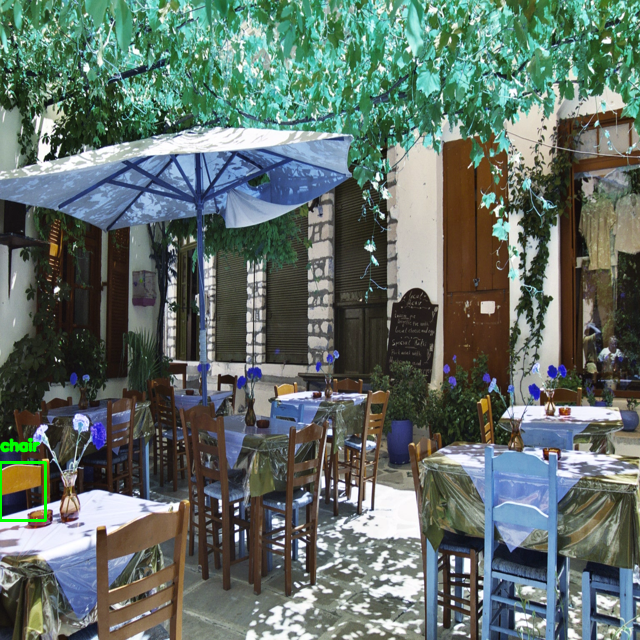

In [56]:
# Impresión de imagen y objeto identificado.
print_img(3)

[390.76752 336.4253  505.92047 387.76794]


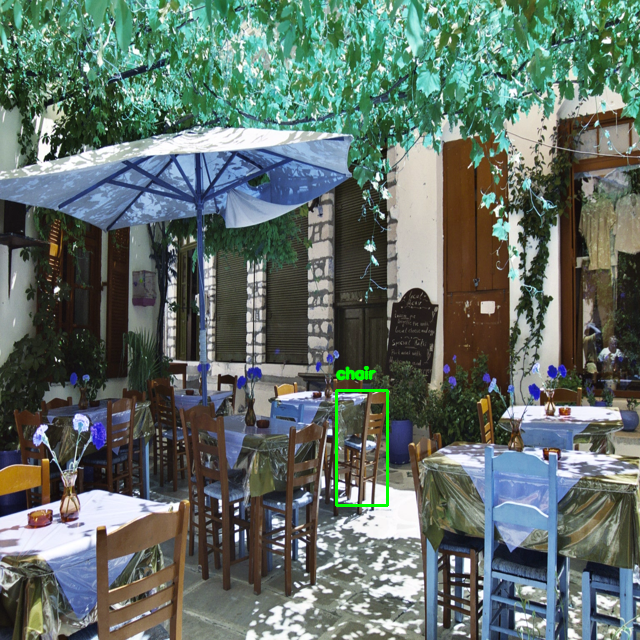

In [57]:
# Impresión de imagen y objeto identificado.
print_img(4)

[327.57388   64.549416 408.30136  104.57078 ]


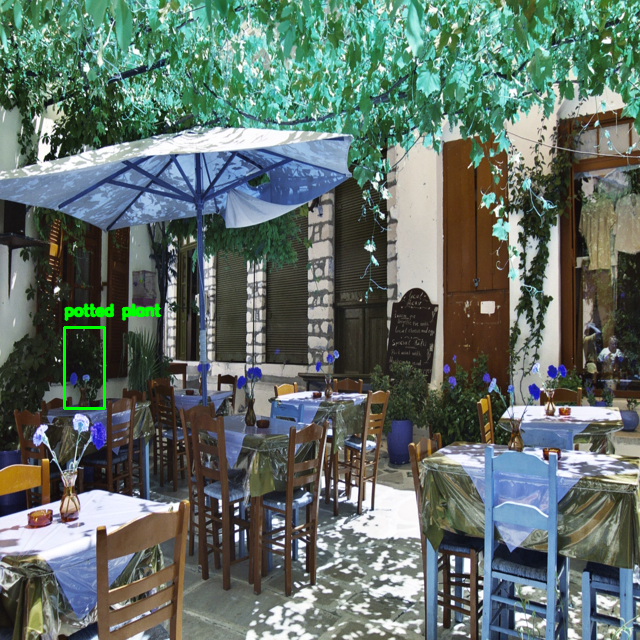

In [58]:
# Impresión de imagen y objeto identificado.
print_img(20)

[400.66724 128.08102 501.33167 157.98447]


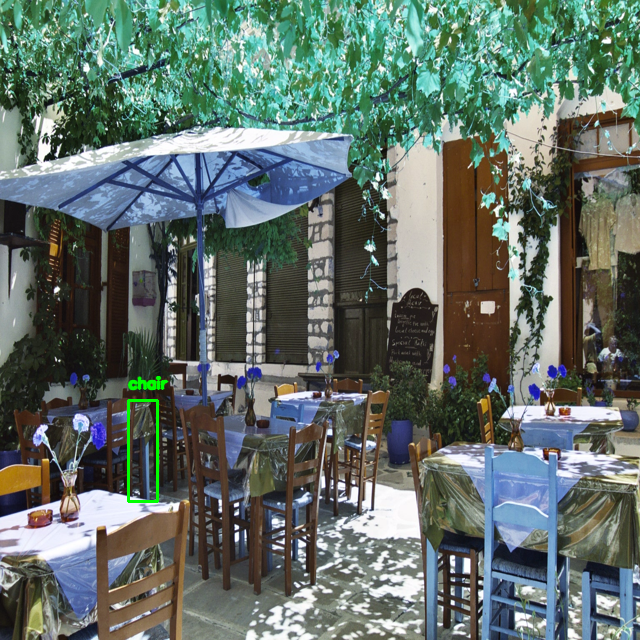

In [59]:
# Impresión de imagen y objeto identificado.
print_img(50)